In [31]:
## import numpy as np
import pandas as pd
from pandas import Series
import matplotlib.pyplot as plt
import seaborn as sns

plt.style.use('seaborn')
sns.set(font_scale=2.5) 
# 이 두줄은 본 필자가 항상 쓰는 방법입니다. matplotlib 의 기본 scheme 말고 
# seaborn scheme 을 세팅하고, 일일이 graph 의 font size 를 지정할 필요 없이 seaborn 의 font_scale 을 사용하면 편합니다.
# import plotly.offline as py
# py.init_notebook_mode(connected=True)
# import plotly.graph_objs as go
# import plotly.tools as tls

#ignore warnings
import warnings
warnings.filterwarnings('ignore')



%matplotlib inline


df_train = pd.read_csv('/Users/gim-wonbae/Kaggle/Kaggle_Tutorial_Titanic/data/train.csv')
df_test = pd.read_csv('/Users/gim-wonbae/Kaggle/Kaggle_Tutorial_Titanic/data/test.csv')



In [23]:
for col in df_train.columns:
    msg = 'colums: {:<10} \t Percent of NaN value: {:2f}%'.format(col, 100 * (df_train[col].isnull().sum() / df_train[col].shape[0]))
    print(msg)


colums: PassengerId 	 Percent of NaN value: 0.000000%
colums: Survived   	 Percent of NaN value: 0.000000%
colums: Pclass     	 Percent of NaN value: 0.000000%
colums: Name       	 Percent of NaN value: 0.000000%
colums: Sex        	 Percent of NaN value: 0.000000%
colums: Age        	 Percent of NaN value: 19.865320%
colums: SibSp      	 Percent of NaN value: 0.000000%
colums: Parch      	 Percent of NaN value: 0.000000%
colums: Ticket     	 Percent of NaN value: 0.000000%
colums: Fare       	 Percent of NaN value: 0.000000%
colums: Cabin      	 Percent of NaN value: 77.104377%
colums: Embarked   	 Percent of NaN value: 0.224467%


In [24]:
for col in df_test.columns:
    msg = 'colums: {:>10} \t Percent of NaN value: {:2f}%'.format(col, 100 * (df_test[col].isnull().sum() / df_test[col].shape[0]))
    print(msg)


colums: PassengerId 	 Percent of NaN value: 0.000000%
colums:     Pclass 	 Percent of NaN value: 0.000000%
colums:       Name 	 Percent of NaN value: 0.000000%
colums:        Sex 	 Percent of NaN value: 0.000000%
colums:        Age 	 Percent of NaN value: 20.574163%
colums:      SibSp 	 Percent of NaN value: 0.000000%
colums:      Parch 	 Percent of NaN value: 0.000000%
colums:     Ticket 	 Percent of NaN value: 0.000000%
colums:       Fare 	 Percent of NaN value: 0.239234%
colums:      Cabin 	 Percent of NaN value: 78.229665%
colums:   Embarked 	 Percent of NaN value: 0.000000%


In [26]:
# msno.matrix(df=df_train.iloc[:, :], figsize=(8, 8), color=(0.2, 0.5, 0.2))

In [27]:
# msno.bar(df=df_train.iloc[:, :], figsize=(8, 8), color=(0.2, 0.3, 0.2))

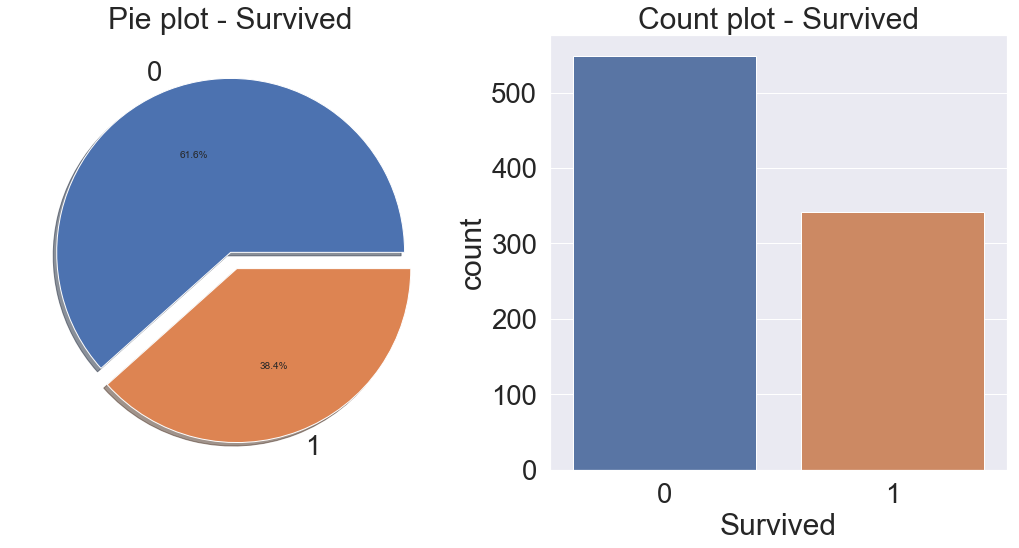

In [28]:
f, ax = plt.subplots(1,2,figsize=(18,8))#도화지

df_train['Survived'].value_counts().plot.pie(explode=[0, 0.1], autopct = '%1.1f%%', ax=ax[0], shadow=True)
ax[0].set_title('Pie plot - Survived')
ax[0].set_ylabel('')

sns.countplot('Survived', data = df_train, ax=ax[1])
ax[1].set_title('Count plot - Survived')
plt.show()

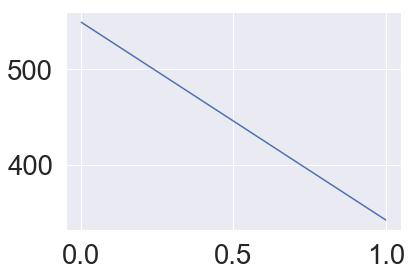

In [36]:
df_train['Survived'].value_counts().plot()

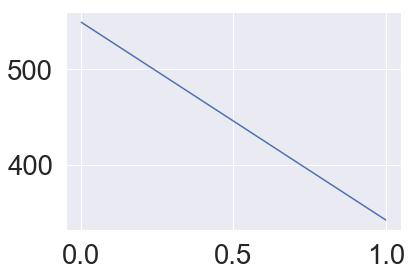

In [37]:
plt.plot(df_train['Survived'].value_counts())

2.1 Pclass

In [38]:
df_train[['Pclass', 'Survived']].groupby(['Pclass'], as_index = True).count()

,Survived
Pclass,
1,216
2,184
3,491


In [39]:
df_train[['Pclass', 'Survived']].groupby(['Pclass']).sum()

,Survived
Pclass,
1,136
2,87
3,119


In [40]:
pd.crosstab(df_train['Pclass'], df_train["Survived"], margins=True).style.background_gradient(cmap='cool')

Survived,0,1,All
Pclass,,,
1,80,136,216
2,97,87,184
3,372,119,491
All,549,342,891


TypeError: bar() missing 2 required positional arguments: 'x' and 'height'

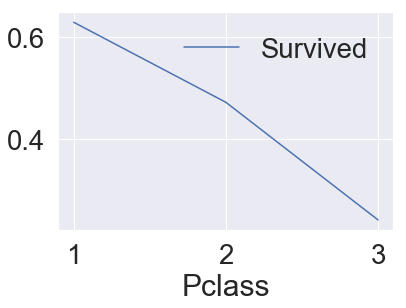

In [41]:
df_train[['Pclass', 'Survived']].groupby(['Pclass'], as_index=True).mean().sort_values(by='Survived', ascending=False).plot().bar()

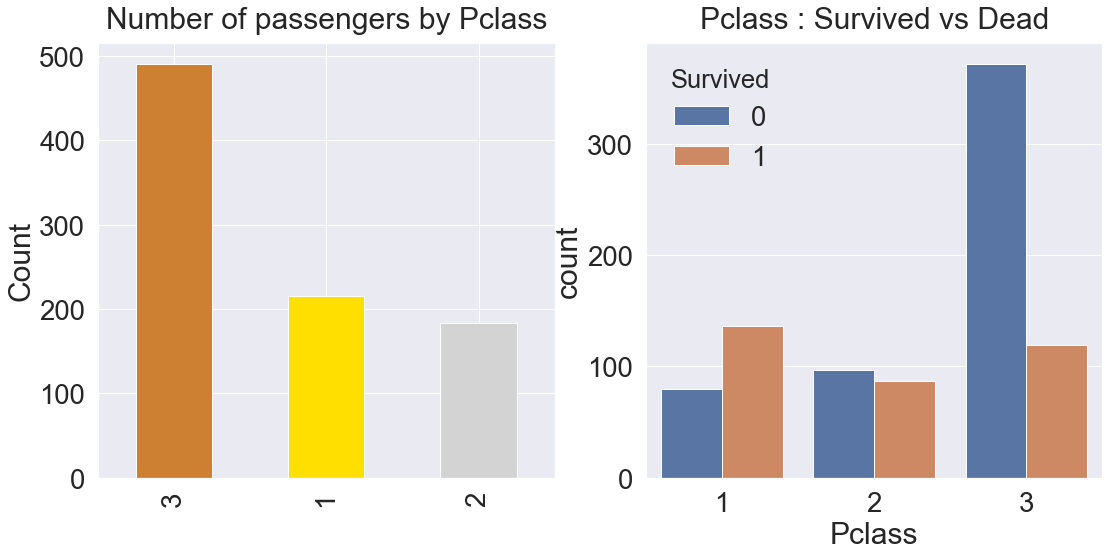

In [42]:
y_position = 1.02
f, ax = plt.subplots(1,2, figsize=(18,8))
df_train['Pclass'].value_counts().plot.bar(color=['#CD7F32', '#FFDF00', '#D3D3D3'], ax=ax[0])
ax[0].set_title('Number of passengers by Pclass', y = y_position)
ax[0].set_ylabel('Count')
sns.countplot('Pclass', hue='Survived', data = df_train, ax=ax[1])
ax[1].set_title('Pclass : Survived vs Dead', y = y_position)
plt.show()

2.2 Sex

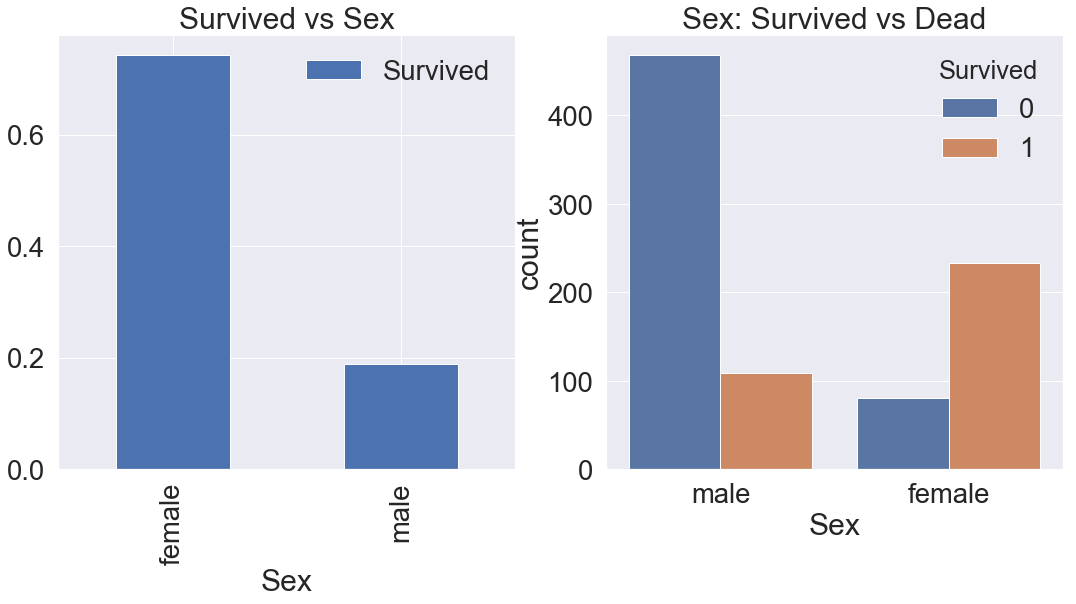

In [43]:
f, ax = plt.subplots(1,2, figsize=(18,8))
df_train[['Sex','Survived']].groupby(['Sex'], as_index=True).mean().plot.bar(ax=ax[0])
ax[0].set_title('Survived vs Sex')

sns.countplot('Sex', hue='Survived', data = df_train, ax=ax[1])
ax[1].set_title('Sex: Survived vs Dead')
plt.show()

In [44]:
pd.crosstab(df_train['Sex'], df_train['Survived'], margins=True).style.background_gradient(cmap='summer_r')

Survived,0,1,All
Sex,,,
female,81,233,314
male,468,109,577
All,549,342,891


2.2 Both Pclass and Sex


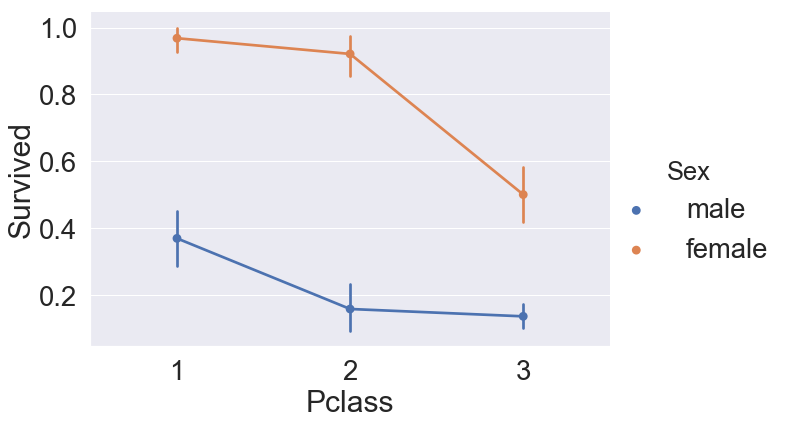

In [45]:
sns.factorplot('Pclass','Survived',hue='Sex',data = df_train, size=6, aspect=1.5)

1. Lady first
2. Money brings survival?

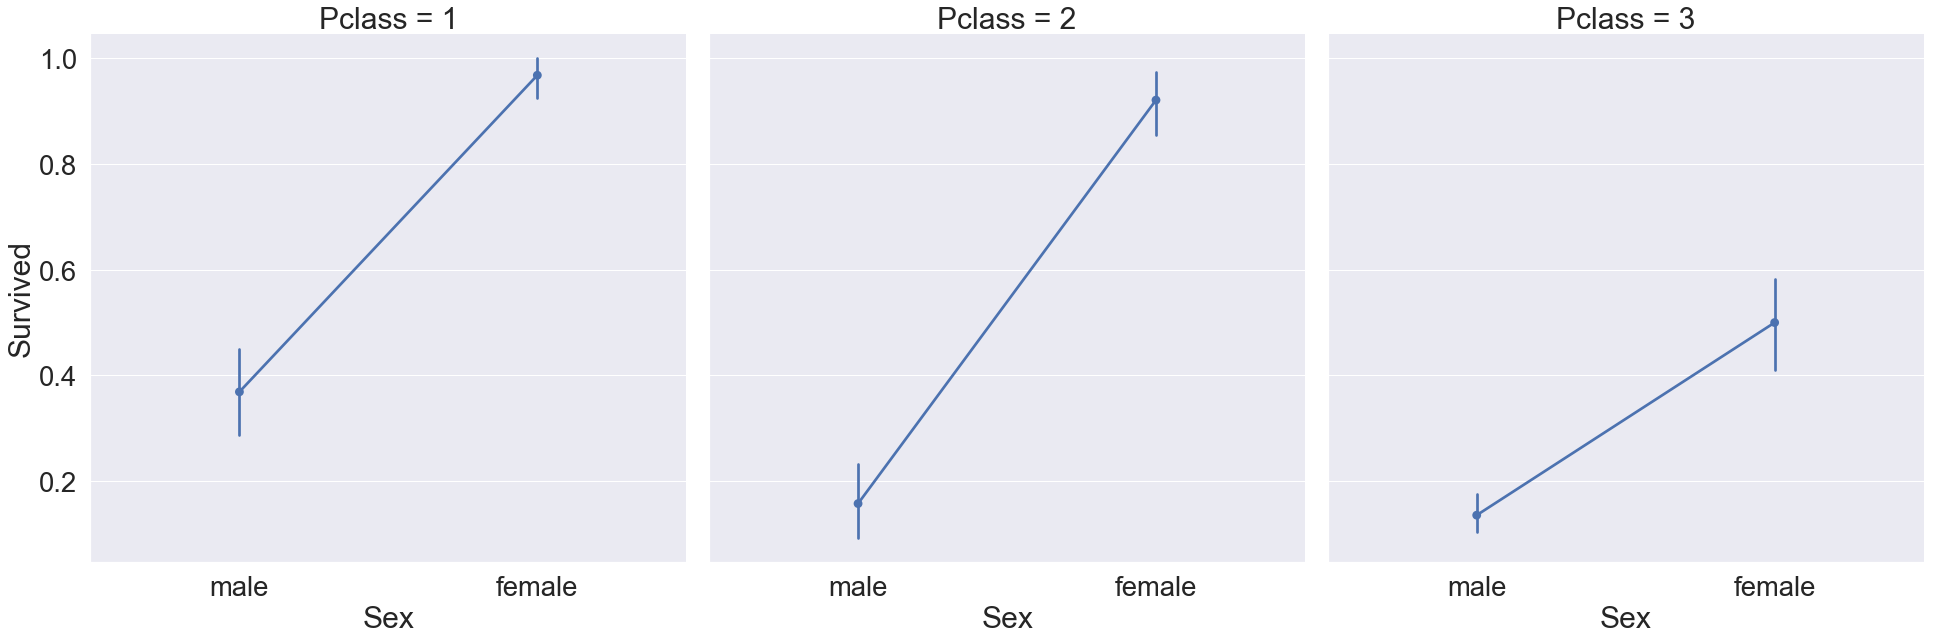

In [46]:
sns.factorplot(x='Sex', y='Survived', col = 'Pclass', data=df_train, saturation = 5,size=9, aspect = 1)

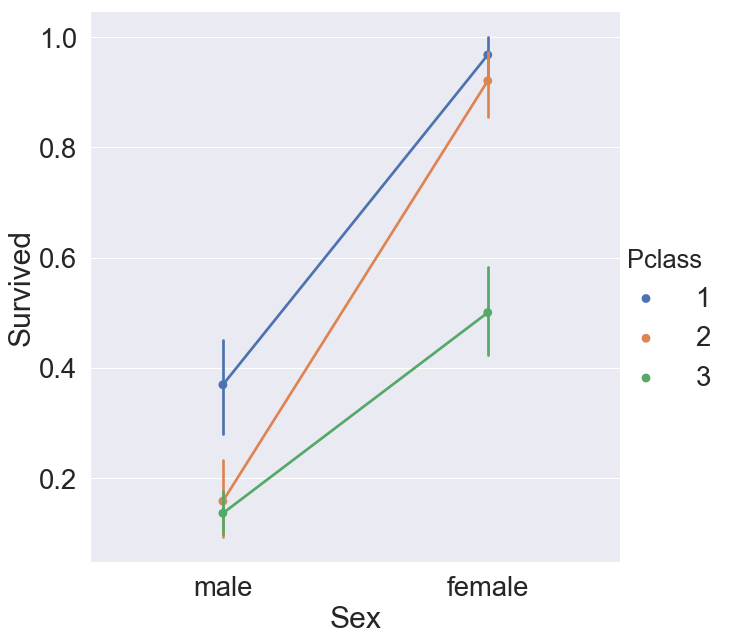

In [47]:
sns.factorplot(x='Sex', y='Survived', hue = 'Pclass', data=df_train, saturation = 5,size=9, aspect = 1)

2.3. Age

In [48]:
print('제일 나이 많은 탑승객 : {:.1f} years'.format(df_train['Age'].max()))
print('제일 어린 탑승객: {:.1f} Years'.format(df_train['Age'].min()))
print('탑승객 평균 나이 : {:.1f} Years'.format(df_train['Age'].mean()))

제일 나이 많은 탑승객 : 80.0 years
제일 어린 탑승객: 0.4 Years
탑승객 평균 나이 : 29.7 Years
